## Alloy optimization

We use multi-objective optimization to select the cheapest alloys exhibiting an enhanced *X* property after mixing. This is a useful problem for illustrating flexibility in defining an optimization problem in MOSA.

The pure, fictitious elements have symbols in the A...Z range. The dataset used to obtain the *X* property and the cost associated with the pure elements was generated by the Python code below:
```
from numpy import random

component=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
x0=0.5
x1=12.6
x=[(x0*k+x1)+random.uniform(0.0,5.0) for k in range(len(component))]
cost=[random.uniform(5.0,500.0) for k in range(len(component))]   

with open("dataset","w") as f:
    f.write("Component,X,Cost\n")
    
    for i in range(len(component)):
        f.write("%s,%f,%f\n" % (component[i],x[i],cost[i]))
```

In [1]:
from mosa import Anneal
from time import time
from pandas import read_csv
%matplotlib inline

In [2]:
df=read_csv("dataset")

### Translating the alloy optimization problem into Python code

A Python function *fobj* implements the problem. A solution is taken as its only argument. The solution is 
a Python dictionary with the same two keys as the population. In the alloy optimization problem, the first 
element in the "Component" key is the matrix element, while the second is the alloying element. "Concentration" gives the 
relative amount of the alloying element in the alloy. *fobj* returns the values of the two objectives for the current trial solution.

Both the *X* property and the cost of pure elements are loaded from the *pandas* dataframe defined above. Notice that both the *X* property and the cost of the alloy results from a simple mixing rule. Also, maximizing *X* is equivalent to minimizing 
-*X*, that is why -*x* is returned by *fobj*.

In [3]:
def fobj(solution):
    elem1=df[df.Component==solution["Component"][0]]
    elem2=df[df.Component==solution["Component"][1]]
    conc=solution["Concentration"]
    x1=elem1.X.values[0]
    cost1=elem1.Cost.values[0]
    x2=elem2.X.values[0]
    cost2=elem2.Cost.values[0]  
    x=x1*(1.0-conc)+x2*conc
    cost=cost1*(1.0-conc)+cost2*conc
        
    return -x,cost

### Initialization

An *Anneal* object is created. Then attributes of the *opt* object are set to control how the optimization process will take place.

In [4]:
opt=Anneal()

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
         Developed by Prof. Roberto Gomes         
   Universidade Federal do ABC (UFABC), Brazil    




In [5]:
opt.population={"Component":df.Component.values.tolist(),"Concentration":(0.0,0.1)}
opt.initial_temperature=1.0
opt.number_of_temperatures=100
opt.number_of_iterations=200
opt.objective_weights=[(df.X.values.max()-df.X.values.min()),(df.Cost.values.max()-df.Cost.values.min())]
opt.archive_size=1000
opt.maximum_archive_rejections=1000
opt.number_of_solution_elements={"Component":2,"Concentration":1}
opt.solution_key_selection_weights={"Component":1.0,"Concentration":4.0}
opt.no_repeated_elements={"Component":True}
opt.exchange_probability={"Component":1.0,"Concentration":1.0}
opt.mc_step_size={"Concentration":0.05}

IMPORTANT: Restarting from previous runs is disabled.

In [6]:
opt.restart=False

### Run 1

The optimization process actually occurs when the *evolve* method is called with *fobj* as argument.

In [7]:
opt.archive_file="archive1.json"
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))
archive1=opt.copyx()

--- BEGIN: Evolving a solution ---

Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['Component']:
        Number of elements in the solution: 2
        Discrete sampling space
        Number of elements in the population: 26
        Elements cannot be repeated in the solution: True
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to select an element in the population, using a triangular distribution: 13
    ['Concentration']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,0.1)
        Selection weight of this key: 4.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deleti

    Number of accepted moves: 98.
    Fraction of accepted moves: 0.490000.
    Number of archive updates: 24.
    Fraction of archive updates in accepted moves: 0.244898.
------
TEMPERATURE: 0.018248
    Number of accepted moves: 84.
    Fraction of accepted moves: 0.420000.
    No archive update.
------
TEMPERATURE: 0.016423
    Number of accepted moves: 134.
    Fraction of accepted moves: 0.670000.
    Number of archive updates: 15.
    Fraction of archive updates in accepted moves: 0.111940.
------
TEMPERATURE: 0.014781
    Number of accepted moves: 68.
    Fraction of accepted moves: 0.340000.
    Number of archive updates: 6.
    Fraction of archive updates in accepted moves: 0.088235.
------
TEMPERATURE: 0.013303
    Number of accepted moves: 108.
    Fraction of accepted moves: 0.540000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.064815.
------
TEMPERATURE: 0.011973
    Number of accepted moves: 76.
    Fraction of accepted moves: 0.

### Output 1

Below we print the content of the first solution archive, we also print some basic statistics, and then plot *X* vs. *Cost*.

In [8]:
opt.printx()

===
Solutions:
1) {'Component': ['Z', 'G'], 'Concentration': 0.06336468118637967}
2) {'Component': ['Z', 'G'], 'Concentration': 0.09592484736179602}
3) {'Component': ['Z', 'G'], 'Concentration': 0.025751731500718883}
4) {'Component': ['Z', 'G'], 'Concentration': 0.07020587491275006}
5) {'Component': ['Z', 'G'], 'Concentration': 0.032562269204030436}
6) {'Component': ['Z', 'A'], 'Concentration': 0.032562269204030436}
7) {'Component': ['I', 'K'], 'Concentration': 0.09724745337938226}
8) {'Component': ['I', 'M'], 'Concentration': 0.09700689050074415}
9) {'Component': ['I', 'M'], 'Concentration': 0.00860705648878303}
10) {'Component': ['I', 'Q'], 'Concentration': 0.026468926064316167}
11) {'Component': ['I', 'Q'], 'Concentration': 0.09532001115305232}
12) {'Component': ['I', 'Q'], 'Concentration': 0.06312744681938585}
13) {'Component': ['I', 'N'], 'Concentration': 0.03565110093014187}
14) {'Component': ['I', 'N'], 'Concentration': 0.005658194922649462}
15) {'Component': ['I', 'N'], 'Concen

In [9]:
opt.printstats()

===
Objective function 0: 
    Minimum: -28.219496
    Maximum: -17.710409
    Average: -26.436124
===
Objective function 1: 
    Minimum: 24.108290
    Maximum: 401.415492
    Average: 83.687236


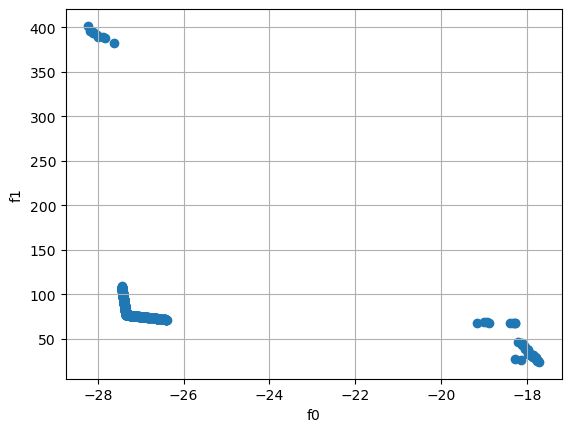

In [10]:
opt.plotfront()

### Run 2

Second optimization run starts from scratch. It means that, by calling the *evolve* method, the previous archive is lost.

In [11]:
opt.archive_file="archive2.json"
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))
archive2=opt.copyx()

--- BEGIN: Evolving a solution ---

Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['Component']:
        Number of elements in the solution: 2
        Discrete sampling space
        Number of elements in the population: 26
        Elements cannot be repeated in the solution: True
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to select an element in the population, using a triangular distribution: 13
    ['Concentration']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,0.1)
        Selection weight of this key: 4.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deleti

    Number of accepted moves: 76.
    Fraction of accepted moves: 0.380000.
    No archive update.
------
TEMPERATURE: 0.014781
    Number of accepted moves: 78.
    Fraction of accepted moves: 0.390000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.025641.
------
TEMPERATURE: 0.013303
    Number of accepted moves: 89.
    Fraction of accepted moves: 0.445000.
    Number of archive updates: 16.
    Fraction of archive updates in accepted moves: 0.179775.
------
TEMPERATURE: 0.011973
    Number of accepted moves: 73.
    Fraction of accepted moves: 0.365000.
    Number of archive updates: 8.
    Fraction of archive updates in accepted moves: 0.109589.
------
TEMPERATURE: 0.010775
    Number of accepted moves: 95.
    Fraction of accepted moves: 0.475000.
    No archive update.
------
TEMPERATURE: 0.009698
    Number of accepted moves: 55.
    Fraction of accepted moves: 0.275000.
    Number of archive updates: 10.
    Fraction of archive updates 

    Number of accepted moves: 25.
    Fraction of accepted moves: 0.125000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.080000.
------
TEMPERATURE: 0.000094
    Number of accepted moves: 24.
    Fraction of accepted moves: 0.120000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.041667.
------
TEMPERATURE: 0.000085
    Number of accepted moves: 16.
    Fraction of accepted moves: 0.080000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.062500.
------
TEMPERATURE: 0.000076
    Number of accepted moves: 1.
    Fraction of accepted moves: 0.005000.
    No archive update.
------
TEMPERATURE: 0.000069
    Number of accepted moves: 6.
    Fraction of accepted moves: 0.030000.
    No archive update.
------
TEMPERATURE: 0.000062
    Number of accepted moves: 3.
    Fraction of accepted moves: 0.015000.
    Number of archive updates: 1.
    Fraction of archive updates in ac

### Output 2

Below we print the content of the second solution archive, we also print some basic statistics, and then plot *X* vs. *Cost*.

In [12]:
opt.printx()

===
Solutions:
1) {'Component': ['E', 'Y'], 'Concentration': 0.011592912942558369}
2) {'Component': ['E', 'Y'], 'Concentration': 0.033404890088295634}
3) {'Component': ['Z', 'Y'], 'Concentration': 0.033404890088295634}
4) {'Component': ['Z', 'Y'], 'Concentration': 0.02450403632839153}
5) {'Component': ['Z', 'Y'], 'Concentration': 0.030402347049937446}
6) {'Component': ['E', 'I'], 'Concentration': 0.0014196829236398228}
7) {'Component': ['E', 'I'], 'Concentration': 0.022598792018361416}
8) {'Component': ['E', 'I'], 'Concentration': 0.025858432165556625}
9) {'Component': ['E', 'I'], 'Concentration': 0.016805146746459824}
10) {'Component': ['E', 'I'], 'Concentration': 0.01760304186351344}
11) {'Component': ['E', 'I'], 'Concentration': 0.047999406313333395}
12) {'Component': ['E', 'I'], 'Concentration': 0.08629830033156012}
13) {'Component': ['E', 'I'], 'Concentration': 0.01380565641812461}
14) {'Component': ['E', 'I'], 'Concentration': 0.09361226958761627}
15) {'Component': ['E', 'I'], 'C

In [13]:
opt.printstats()

===
Objective function 0: 
    Minimum: -28.373949
    Maximum: -17.708186
    Average: -26.345149
===
Objective function 1: 
    Minimum: 24.004930
    Maximum: 399.979482
    Average: 95.718456


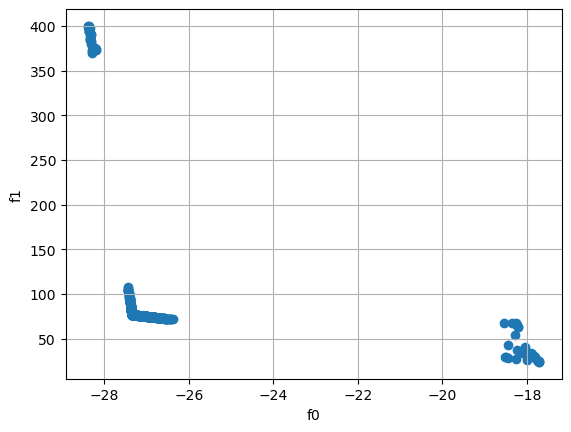

In [14]:
opt.plotfront()

### Run 3

Third optimization run also starts from scratch.

In [15]:
opt.archive_file="archive3.json"
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))
archive3=opt.copyx()

--- BEGIN: Evolving a solution ---

Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['Component']:
        Number of elements in the solution: 2
        Discrete sampling space
        Number of elements in the population: 26
        Elements cannot be repeated in the solution: True
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to select an element in the population, using a triangular distribution: 13
    ['Concentration']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,0.1)
        Selection weight of this key: 4.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deleti

    Number of accepted moves: 90.
    Fraction of accepted moves: 0.450000.
    Number of archive updates: 8.
    Fraction of archive updates in accepted moves: 0.088889.
------
TEMPERATURE: 0.014781
    Number of accepted moves: 93.
    Fraction of accepted moves: 0.465000.
    Number of archive updates: 9.
    Fraction of archive updates in accepted moves: 0.096774.
------
TEMPERATURE: 0.013303
    Number of accepted moves: 101.
    Fraction of accepted moves: 0.505000.
    Number of archive updates: 10.
    Fraction of archive updates in accepted moves: 0.099010.
------
TEMPERATURE: 0.011973
    Number of accepted moves: 88.
    Fraction of accepted moves: 0.440000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.022727.
------
TEMPERATURE: 0.010775
    Number of accepted moves: 69.
    Fraction of accepted moves: 0.345000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.057971.
------
TEMPERATURE: 0.00969

### Output 3

Below we print the content of the third solution archive, we also print some basic statistics, and then plot *X* vs. *Cost*.

In [16]:
opt.printx()

===
Solutions:
1) {'Component': ['Z', 'R'], 'Concentration': 0.06834998587833073}
2) {'Component': ['Z', 'R'], 'Concentration': 0.07899115931189793}
3) {'Component': ['I', 'M'], 'Concentration': 0.0004616867585934478}
4) {'Component': ['I', 'M'], 'Concentration': 0.07167295647606856}
5) {'Component': ['I', 'O'], 'Concentration': 0.0011988401980937008}
6) {'Component': ['I', 'T'], 'Concentration': 0.035854062618080974}
7) {'Component': ['I', 'R'], 'Concentration': 0.09070280301606387}
8) {'Component': ['I', 'U'], 'Concentration': 0.08572478729164934}
9) {'Component': ['I', 'U'], 'Concentration': 0.09448547072868452}
10) {'Component': ['I', 'U'], 'Concentration': 0.0009987332881160327}
11) {'Component': ['I', 'N'], 'Concentration': 0.004461265760352839}
12) {'Component': ['Z', 'D'], 'Concentration': 0.01882873272386197}
13) {'Component': ['Z', 'D'], 'Concentration': 0.08795298271145811}
14) {'Component': ['Z', 'D'], 'Concentration': 0.00521377849393484}
15) {'Component': ['Z', 'D'], 'Con

In [17]:
opt.printstats()

===
Objective function 0: 
    Minimum: -28.378466
    Maximum: -17.706544
    Average: -26.157540
===
Objective function 1: 
    Minimum: 24.009678
    Maximum: 400.310518
    Average: 109.981647


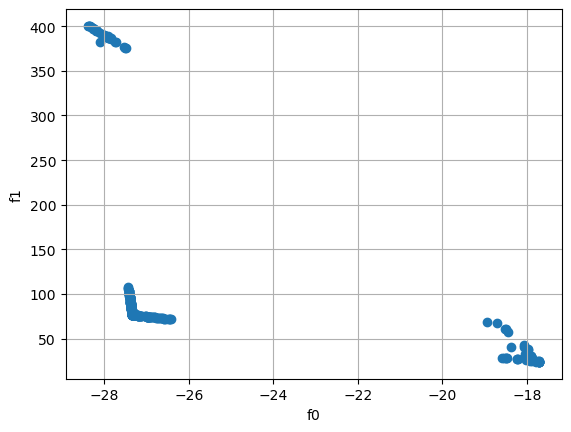

In [18]:
opt.plotfront()

### Merges the three solution archives and removes the dominated solutions from the resulting archive

Next, we merge the three solution archives and eliminate from the resulting archive the dominated solutions, printing only the non-dominated solutions and some basic statistics, and plotting again *X* vs. *Cost*. Merging archives from different runs, as you can see, provides a simple manner of performing parallel runs.

In [19]:
merged=opt.mergex([archive1,archive2,archive3])
pruned=opt.prunedominated(xset=merged,delduplicated=True)
opt.savex(xset=pruned,archivefile="merged_archive.json")
opt.printx(pruned)

===
Solutions:
1) {'Component': ['I', 'N'], 'Concentration': 0.0006414011422147606}
2) {'Component': ['E', 'X'], 'Concentration': 0.09914451501209795}
3) {'Component': ['X', 'Z'], 'Concentration': 0.02326643466788015}
4) {'Component': ['X', 'Z'], 'Concentration': 0.012266957875922697}
5) {'Component': ['X', 'Z'], 'Concentration': 0.016655586903885106}
6) {'Component': ['X', 'Z'], 'Concentration': 0.020840120299393722}
7) {'Component': ['X', 'Z'], 'Concentration': 0.07833277146426518}
8) {'Component': ['X', 'Z'], 'Concentration': 0.07803141013116068}
9) {'Component': ['X', 'Z'], 'Concentration': 0.05121583477267387}
10) {'Component': ['I', 'X'], 'Concentration': 0.04379405051452792}
11) {'Component': ['I', 'X'], 'Concentration': 0.05971332674933705}
12) {'Component': ['X', 'I'], 'Concentration': 0.03798456838576458}
13) {'Component': ['X', 'I'], 'Concentration': 0.03017639341199614}
14) {'Component': ['X', 'I'], 'Concentration': 0.006604234245901099}
15) {'Component': ['X', 'I'], 'Conce

In [20]:
opt.printstats(pruned)

===
Objective function 0: 
    Minimum: -28.378466
    Maximum: -17.708186
    Average: -27.008120
===
Objective function 1: 
    Minimum: 24.004930
    Maximum: 400.310518
    Average: 85.251715


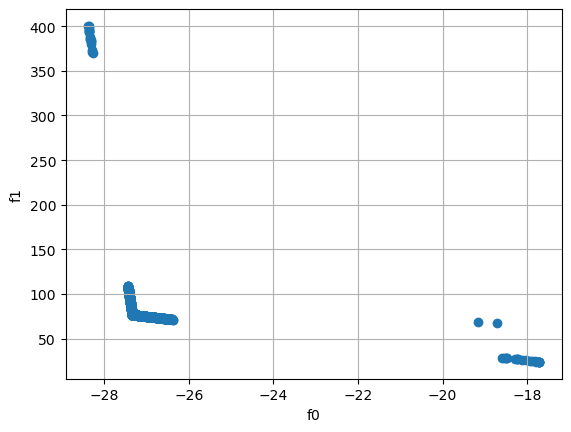

In [21]:
opt.plotfront(pruned)

### Decision making

Many solutions (i.e., candidate alloys) still remain in the archive and it is hard to choose one or two out of them. 

In order to reduce the solution set to something a human being is able to deal with, first, the *trimx* method is 
used to select only the alloys that present a reasonable (according to the users needs) value of the *X* property.

In [22]:
trimmed=opt.trimx(xset=pruned,thresholds=[-25.0,None])
opt.printx(trimmed)

===
Solutions:
1) {'Component': ['X', 'Z'], 'Concentration': 0.02326643466788015}
2) {'Component': ['X', 'Z'], 'Concentration': 0.012266957875922697}
3) {'Component': ['X', 'Z'], 'Concentration': 0.016655586903885106}
4) {'Component': ['X', 'Z'], 'Concentration': 0.020840120299393722}
5) {'Component': ['X', 'Z'], 'Concentration': 0.07833277146426518}
6) {'Component': ['X', 'Z'], 'Concentration': 0.07803141013116068}
7) {'Component': ['X', 'Z'], 'Concentration': 0.05121583477267387}
8) {'Component': ['X', 'I'], 'Concentration': 0.03798456838576458}
9) {'Component': ['X', 'I'], 'Concentration': 0.03017639341199614}
10) {'Component': ['X', 'I'], 'Concentration': 0.006604234245901099}
11) {'Component': ['X', 'I'], 'Concentration': 0.03678635559251054}
12) {'Component': ['X', 'I'], 'Concentration': 0.023911226666875292}
13) {'Component': ['X', 'I'], 'Concentration': 0.08656079280938778}
14) {'Component': ['X', 'I'], 'Concentration': 0.09555055141239226}
15) {'Component': ['X', 'I'], 'Concen

The next step is to reduce a way more the number of solutions. Below, we use the *reducex* method to select 10 alloying candidates with the lowest cost, assuming the cost is the variable that counts the most for the user.

In [23]:
sol1=opt.reducex(xset=trimmed,index=1,nel=10)
opt.printx(sol1)

===
Solutions:
1) {'Component': ['X', 'I'], 'Concentration': 0.09987065697327216}
2) {'Component': ['X', 'I'], 'Concentration': 0.09925145255438424}
3) {'Component': ['X', 'I'], 'Concentration': 0.09770020263694275}
4) {'Component': ['X', 'I'], 'Concentration': 0.09725606646924498}
5) {'Component': ['X', 'I'], 'Concentration': 0.09720984270614708}
6) {'Component': ['X', 'I'], 'Concentration': 0.09638965621149669}
7) {'Component': ['X', 'I'], 'Concentration': 0.09628543341020165}
8) {'Component': ['X', 'I'], 'Concentration': 0.09613972627889711}
9) {'Component': ['X', 'I'], 'Concentration': 0.09555055141239226}
10) {'Component': ['X', 'I'], 'Concentration': 0.09532495476126049}
Values:
1) [-26.379721411026352, 71.48286117349447]
2) [-26.385686923613008, 71.51554540876931]
3) [-26.40063190886388, 71.59742695826277]
4) [-26.404910786432858, 71.62087034877536]
5) [-26.405356113423675, 71.62331023502665]
6) [-26.413257918882415, 71.66660315662521]
7) [-26.41426201771307, 71.67210447808645]


To reduce the number of candidates even further, we use the *reducex* method again, but now to select 5 alloy candidates with the highest value of the *X* property (or, conversely, the lowest value of -*X*).

In [24]:
sol2=opt.reducex(xset=sol1,index=0,nel=5)
opt.printx(sol2)

===
Solutions:
1) {'Component': ['X', 'I'], 'Concentration': 0.09532495476126049}
2) {'Component': ['X', 'I'], 'Concentration': 0.09555055141239226}
3) {'Component': ['X', 'I'], 'Concentration': 0.09613972627889711}
4) {'Component': ['X', 'I'], 'Concentration': 0.09628543341020165}
5) {'Component': ['X', 'I'], 'Concentration': 0.09638965621149669}
Values:
1) [-26.42351541981212, 71.72280261456754]
2) [-26.421341986256444, 71.7108946665654]
3) [-26.41566578309208, 71.67979551842066]
4) [-26.41426201771307, 71.67210447808645]
5) [-26.413257918882415, 71.66660315662521]
